# Airline Passenger Satisfaction Prediction - ANN Model

In [45]:
import sklearn
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.impute import SimpleImputer,KNNImputer




from keras.models import Sequential
from keras.layers import InputLayer,Dense,BatchNormalization,Dropout
from keras import regularizers

In [245]:
# Loading the data set
df=pd.read_csv("test.csv")

In [246]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [248]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [249]:
# checking wether the data set is imbalanced or not
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [250]:
df.shape

(25976, 25)

In [251]:
# removing the identical columns like "Unnamed: 0","id"
# because it dont impact the target,
# 
df=df.drop(columns=["Unnamed: 0","id"])

In [252]:
df.shape

(25976, 23)

In [253]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [254]:
df["satisfaction"] = df["satisfaction"].map({
    "satisfied": 1,
    "neutral or dissatisfied": 0
})


In [255]:
# separate your X and y

X = df.drop("satisfaction",axis = 1)
y = df["satisfaction"]

In [256]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

In [257]:
df.duplicated().sum()

np.int64(0)

In [258]:
cat_col = X.select_dtypes(exclude = ["int","float"]).columns.tolist()
num_col = X.select_dtypes(include = ["int","float"]).columns.tolist()

In [259]:
cat_col

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [260]:
for i in cat_col:
    count=X[i].unique()
    print(count)
    print("*"*100)

['Female' 'Male']
****************************************************************************************************
['Loyal Customer' 'disloyal Customer']
****************************************************************************************************
['Business travel' 'Personal Travel']
****************************************************************************************************
['Eco' 'Business' 'Eco Plus']
****************************************************************************************************


In [261]:
# mul_cat=cat_col.pop(3)

In [262]:
# mul_cat=list(mul_cat)

In [263]:
# mul_cat

In [264]:
# cat_col

In [265]:
label_col=[]
ord_col=[]
for i in cat_col:
    if i!="Class":
        label_col.append(i)
    else:
        ord_col.append(i)
        
        

In [266]:
label_col

['Gender', 'Customer Type', 'Type of Travel']

In [267]:
ord_col

['Class']

In [268]:
num_col

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [269]:
# NUM col
num_cat_col=[]
num_col_2=[]
for i in num_col:
    if i in ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']:
        num_col_2.append(i)
    else:
        num_cat_col.append(i)

In [270]:
num_cat_col

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [271]:
num_col_2

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [272]:
# Trainvalset and test set

X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,test_size = 0.2,
                                                       stratify=y,
                                                       random_state=13)


In [273]:
# train and validation

X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,test_size = 0.2,
                                                       stratify=y_trainval,
                                                       random_state=13)

In [274]:
# X['Arrival Delay in Minutes'].median()

In [275]:
from sklearn.base import BaseEstimator, TransformerMixin


class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        # Convert to DataFrame (fix numpy array issue)
        X = pd.DataFrame(X)
        
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        # Convert to DataFrame
        X = pd.DataFrame(X).copy()

        for col in X.columns:
            X[col] = self.encoders[col].transform(X[col])

        return X.values  # return numpy array (required by sklearn)


In [276]:
#         Constructor. It creates an instance attribute self.encoders which is a dictionary.

#          Purpose: store a LabelEncoder object for each column. The keys will be column names and the values the fitted LabelEncoder objects.


In [277]:
# Label encoded categorical columns
label_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("label_enc", LabelEncoderTransformer())
])

# Ordinal categorical columns
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal_enc", OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']]))
])

# Numeric columns
SS_pipeline = Pipeline([
    ("knn_imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

# Numeric category columns
MM_pipeline = Pipeline([
    ("knn_imputer", KNNImputer(n_neighbors=5)),
    ("scaler", MinMaxScaler())
])

# Combined ColumnTransformer
preprcesser = ColumnTransformer([
    ("cat_transformation", label_pipeline, label_col),
    ("mul_cat_transformation", ordinal_pipeline, ord_col),
    ("num_transformation", SS_pipeline, num_col_2),
    ("num_cat_transformantion", MM_pipeline, num_cat_col)
])

# # IMP
# preprcesser.set_output(transform="pandas")


In [278]:
# saving pipline
import joblib



In [279]:
preprcesser


,transformers,"[('cat_transformation', ...), ('mul_cat_transformation', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [318]:
label_col 


['Gender', 'Customer Type', 'Type of Travel']

In [319]:
ord_col 


['Class']

In [320]:
num_col_2 

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [321]:

num_cat_col 


['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [280]:
#train

X_train_transformed = preprcesser.fit_transform(X_train)

In [281]:

joblib.dump(preprcesser, "airline_preprocessor_pipeline2.pkl")


['airline_preprocessor_pipeline2.pkl']

In [282]:
# Validation
X_val_transformed= preprcesser.transform(X_val)

C:\Users\mbdin\anaconda3\envs\ann_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [283]:
# test
X_test_transformed= preprcesser.transform(X_test)

C:\Users\mbdin\anaconda3\envs\ann_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [284]:
(X_train_transformed.shape[1],)

(22,)

In [285]:


# Deep Learning Model
Model = Sequential()

# Input layer
Model.add(InputLayer(shape=(X_train_transformed.shape[1],)))

# Hidden layer - 1
Model.add(Dense(units=128,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))
Model.add(Dropout(0.13))
Model.add(BatchNormalization())

# Hidden layer - 2
Model.add(Dense(units=64,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))
Model.add(Dropout(0.10))
Model.add(BatchNormalization())

# Hidden layer - 3
Model.add(Dense(units=32,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))
Model.add(Dropout(0.13))
Model.add(BatchNormalization())

# Output layer
Model.add(Dense(units=1,
                activation="sigmoid",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))

# Compile the model
Model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Model summary
Model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 13,761 (53.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [286]:
# Trianing

history = Model.fit(X_train_transformed,y_train,batch_size=64,epochs= 100,validation_data=(X_val_transformed,y_val))

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8142 - loss: 4.3904 - val_accuracy: 0.8268 - val_loss: 3.0337
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 2.1697 - val_accuracy: 0.7844 - val_loss: 1.7251
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8935 - loss: 1.2398 - val_accuracy: 0.8422 - val_loss: 1.0669
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9078 - loss: 0.7816 - val_accuracy: 0.9093 - val_loss: 0.6544
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9162 - loss: 0.5501 - val_accuracy: 0.9300 - val_loss: 0.4867
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9243 - loss: 0.4258 - val_accuracy: 0.9384 - val_loss: 0.3676
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.3772 - val_accuracy: 0.9403 - val_loss: 0.3210
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9250 - loss: 0.3431 - val_accu

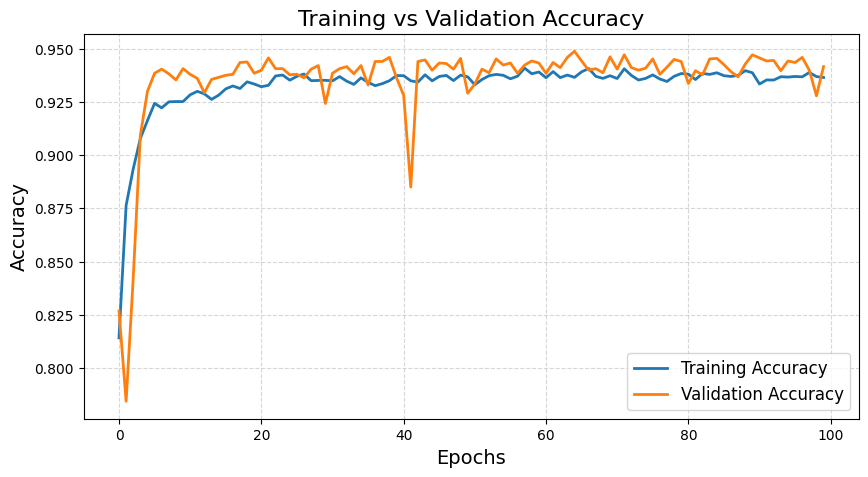

In [287]:
plt.figure(figsize=(10,5))

# Plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy", linewidth=2)

# Plot validation accuracy
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linewidth=2)

# Labels and title
plt.title("Training vs Validation Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Display legend
plt.legend(fontsize=12)

# Add grid for clarity
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


In [288]:
# Evalution

y_pred = (Model.predict(X_test_transformed) > 0.5).astype("int")

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [289]:
y_pred.shape

(5196, 1)

In [290]:
pd.Series(y_pred.reshape(1,5196).tolist()[0]).value_counts()

0    2943
1    2253
Name: count, dtype: int64

In [291]:
accuracy_score(y_pred,y_test)

0.9414934565050038

In [292]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2943
           1       0.93      0.94      0.93      2253

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196



In [293]:
 #Model Saving

Model.save("air_ann.keras")

# hyperparameter Tuning

In [294]:
# pip install keras-tuner


In [295]:
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = Sequential()

    # Input Layer
    # adding input layer from the X_train_transformed data
    model.add(InputLayer(shape=(X_train_transformed.shape[1],)))

    # Number of hidden layers
    num_layers = hp.Int("num_layers", min_value=2, max_value=5)

    for i in range(num_layers):
        
        units = hp.Int(f"units_{i}", min_value=32, max_value=256, step=32)
        reg = hp.Choice("l1_reg", values=[0.001, 0.003, 0.005])# 1-l
        dropout_rate = hp.Float("dropout", min_value=0.1, max_value=0.3, step=0.05)

        model.add(Dense(
            units=units,
            activation="relu",
            kernel_initializer="he_normal",
            kernel_regularizer=regularizers.l1(reg)
        ))
        model.add(Dropout(dropout_rate))
        model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_normal"))

    # Learning Rate Tuning
    lr = hp.Choice("learning_rate", values=[1e-2, 5e-3, 1e-3, 5e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [296]:
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=20,              # Max training per model
    factor=3,                   # Hyperband reduction factor
    directory="hyperband_tuning",
    project_name="airline_satisfaction"
)
# BP
# 3-33.33
# Mod-M,F

Reloading Tuner from hyperband_tuning\airline_satisfaction\tuner0.json


In [297]:
tuner.search(
    X_train_transformed,
    y_train,
    validation_data=(X_val_transformed, y_val),
    epochs=30,
    batch_size=32
)
# validation_split
# bW

In [298]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]


In [299]:
print("Best Hyperparameters:")
for key, value in best_hp.values.items():
    print(key, ":", value)


Best Hyperparameters:
num_layers : 3
units_0 : 256
l1_reg : 0.001
dropout : 0.2
units_1 : 160
learning_rate : 0.001
units_2 : 160
units_3 : 192
units_4 : 64
tuner/epochs : 20
tuner/initial_epoch : 7
tuner/bracket : 2
tuner/round : 2
tuner/trial_id : 0013


In [300]:
# BUILDING MODEL WITH THE TUNED PARAMETERS

best_model = Sequential()

# Input Layer
best_model.add(InputLayer(shape=(X_train_transformed.shape[1],)))

# Hidden Layer 1
best_model.add(Dense(
    256, 
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Hidden Layer 2
best_model.add(Dense(
    128,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Hidden Layer 3
best_model.add(Dense(
    64,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Hidden Layer 4
best_model.add(Dense(
    96,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Output Layer
best_model.add(Dense(
    1,
    activation="sigmoid",
    kernel_initializer="glorot_normal"
))

# Compile the final model
best_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

best_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 256)                 │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,553 (217.00 KB)

 Trainable params: 54,465 (212.75 KB)

 Non-trainable params: 1,088 (4.25 KB)

In [301]:
history = best_model.fit(
    X_train_transformed,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32, 
    verbose=1
)

# BW


Epoch 1/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8378 - loss: 4.6992 - val_accuracy: 0.8740 - val_loss: 3.5496
Epoch 2/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8769 - loss: 2.8270 - val_accuracy: 0.8971 - val_loss: 2.1823
Epoch 3/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8865 - loss: 1.7804 - val_accuracy: 0.8998 - val_loss: 1.4281
Epoch 4/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8940 - loss: 1.2256 - val_accuracy: 0.9086 - val_loss: 1.0176
Epoch 5/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8987 - loss: 0.9096 - val_accuracy: 0.9182 - val_loss: 0.7663
Epoch 6/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9050 - loss: 0.7023 - val_accuracy: 0.9029 - val_loss: 0.6516
Epoch 7/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9113 - loss: 0.5716 - val_accuracy: 0.9257 - val_loss: 0.4928
Epoch 8/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9159 - loss: 0.4898 - val_accuracy: 0.

In [302]:
loss, acc = best_model.evaluate(X_test_transformed, y_test)
print("Test Accuracy:", acc)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9448 - loss: 0.2191
Test Accuracy: 0.9447652101516724


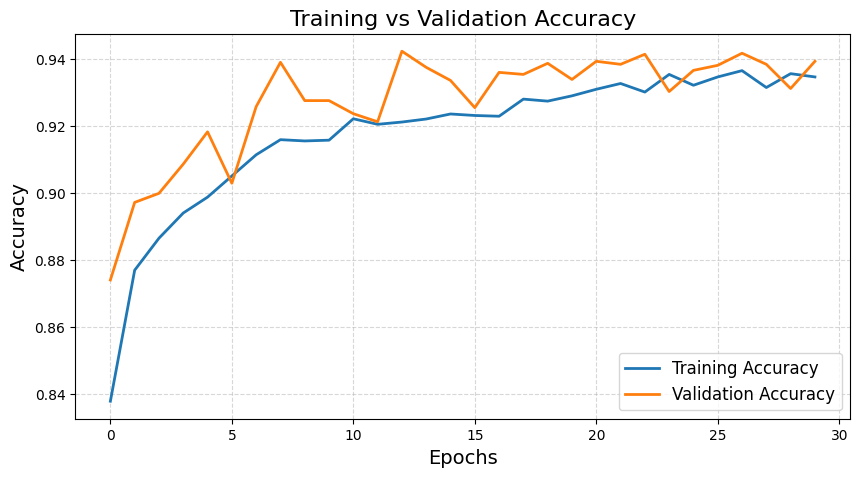

In [303]:
plt.figure(figsize=(10,5))

# Plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy", linewidth=2)

# Plot validation accuracy
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linewidth=2)

# Labels and title
plt.title("Training vs Validation Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Display legend
plt.legend(fontsize=12)

# Add grid for clarity
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


In [304]:
y_pred.shape

(5196, 1)

In [305]:
pd.Series(y_pred.reshape(1,5196).tolist()[0]).value_counts()

0    2943
1    2253
Name: count, dtype: int64

In [306]:
accuracy_score(y_pred,y_test)

0.9414934565050038

In [307]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2943
           1       0.93      0.94      0.93      2253

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196



In [317]:
best_model.save("best_airline_ann_model.keras")


In [309]:
# understanding

In [310]:

X_train_transformed.shape[1]

22

In [311]:
X_train_transformed.shape

(16624, 22)

In [312]:
df_check=pd.DataFrame(X_train_transformed)

In [315]:
print(df_check.columns.tolist())


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [316]:
with pd.option_context('display.max_columns', None):
    print(df_check)


        0    1    2    3         4         5         6         7    8    9   \
0      0.0  0.0  0.0  2.0  0.422929 -0.849782 -0.383379 -0.394175  0.4  0.8   
1      1.0  0.0  0.0  1.0 -0.959048  0.370007 -0.171226 -0.394175  0.6  0.8   
2      1.0  0.0  1.0  0.0  1.278439 -0.258491 -0.383379 -0.183138  0.6  0.8   
3      1.0  0.0  1.0  0.0 -1.353899 -0.565198  6.219891  5.831422  0.4  0.2   
4      1.0  0.0  1.0  1.0 -0.893240  1.063869  0.703906  0.265316  0.4  1.0   
...    ...  ...  ...  ...       ...       ...       ...       ...  ...  ...   
16619  1.0  1.0  0.0  0.0 -1.024857 -0.475700 -0.383379 -0.394175  0.6  0.6   
16620  0.0  0.0  0.0  2.0  0.159696 -0.302737  0.359157  0.344455  0.6  0.6   
16621  1.0  0.0  1.0  0.0  1.541673  0.015031  1.632077  1.357434  0.4  0.8   
16622  0.0  0.0  0.0  1.0 -1.090665 -0.857827 -0.356860 -0.315036  0.4  1.0   
16623  1.0  0.0  0.0  2.0  0.949397  1.578734 -0.303822 -0.394175  0.8  0.8   

        10    11   12   13    14   15   16   17    

In [227]:
df_check.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64